# 10. 케라스를 사용한 인공 신경망 소개

## 10.1. 생물학적 뉴런에서 인공 뉴런까지

인공신경망(ANN)은 1943년의 <a href="http://aiplaybook.a16z.com/reference-material/mcculloch-pitts-1943-neural-networks.pdf">특정 논문</a>에서 소개되었다. 위의 논문에서 소개된 논리적인 개념을 바탕으로 1960년부터 현재에 이르기까지 발전해오고 있다. 그러나 발전에 있어서 인공신경망은 학습을 진행하는데 있어서 마주한 제약으로 인해 어려움을 겪었다. 그리고 지금은 다시 인공 신경망이 부흥하고 있는데 왜 부흥하고 있는가? 그 이유는 아래와 같다.

1. 신경망을 훈련하기 위한 데이터셋의 확보
2. 90년대 이후 발전한 컴퓨터 하드웨어
3. 훈련 알고리즘의 향상
4. 지역 최적점(Local Minima)문제의 해결책 탐구
5. 투자와 진보의 선순환

### 10.1.3. 퍼셉트론

퍼셉트론은 1943년에 논리적인 신경망 구조가 정의된 후, 인공 뉴런이라는 개념을 토대로 1957년에 제안된 가장 간단한 인공 신경망 구조이다. 퍼셉트론은 TLU(Threshold Logic Unit) 또는 LTU(Linear Threshold Unit)라고 불리는 인공 뉴런을 기반으로 만들어졌다. 

![TLU](../../img/TLU.png)

퍼셉트론을 살펴보기전 TLU에 대해서 살펴보자. TLU는 N개의 입력 $I_1 ... I_n$이 있고 이는 각각에 대응되는 가중치 $W_1 ... W_n$의 가중치와 연관되어 있다. 그리고 TLU는 각 입력과 가중치를 곱하여 합을한 후에 계단함수인 Threshold 함수 $T$를 통해 결과를 출력한다.

$h_w(x) = step(z)$

퍼셉트론에서 가장 널리 사용되는 계단 함수는 헤비사이드(heavyside function) 계단함수이며, 종종 부호(sign function) 함수로 대신 사용하기도 한다.

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/f1783c84465f7a602fae566c34efa63f48c84212" />
<div align="center" style="margin-top:20px">헤비사이드 함수</div>

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/bf38b06707caef9847d668ee9022678cc649f421" />
<div align="center" style="margin-top:20px">부호 함수</div>

여기서 TLU를 훈련한다는 것은 최적은 가중치 $W_1, W_2 ... W_n$을 찾는것이다.

퍼셉트론은 은닉층이 하나인 TLU로 구성된다. 그리고 모든 입력값은 은닉층의 뉴런과 모두 연결되어 있기 때문에 fully-connected layer 또는 dense layer(Keras에서 모듈을 부르는 이름)라고 한다.

![MLP_w_bias](../../img/MLP_w_bias.png)

입력층에서는 입력 뉴런으로 구성된다. 입력 뉴런은 간단히 입력 값에 아무런 조치 없이 바로 통과시키는 뉴런이다. 그리고 입력층에서는 편향 특성이 함께 입력값으로 투입한다. 그러나 편향값은 신경망 정의시 뉴런 개수를 정의할 떄 보통 제외하고 정의한다.

<div align="left" style="padding-left:30px; padding-top:30px">
<span>$h_w,b(X) = \phi(XW+b)$</span>
    
<span>**식. 완전 연결 층의 출력 계산**</span>
</div>

* $X$: 입력 특성의 행렬
* 가중치 행렬 $W$: 편향 뉴련을 제외한 모든 연결가중치
* 편향 벡터 $b$: 편향 뉴런과 인공 뉴런 사이의 모든 연결 가중치
* $\phi$: 활성화함수

그렇다면 퍼셉트론은 어떻게 훈련되는가? 이는 헤브의 규칙(Hebb's rule)에서 영감을 많이 받았다. 이는 두 뉴런이 동시에 활성활될 때마다 이들 사이의 연결 가중치가 증가하는 경향이 있다는 것이고, 이는 헤브의 규칙(또는 헤브 학습)으로 알려졌다. 

만약 첫 번째 샘플이 퍼셉트론에 입력으로 주어져서 학습한 후, 잘못된 결과 값을 return한 뉴런에 대해 올바른 예측을 할 수 있도록 입력에 대한 연결된 가중치를 강화 하는 것이다.

<div align="left" style="padding-left:30px; padding-top:30px">
<span>$w_{i,j}^{(next\_step)} = w_{i,j} + \eta(y_j - \hat{y}_j)x_i$</span>
    
<span>**식. 퍼셉트론 학습 규칙(가중치 업데이트)**</span>
</div>

* $w_i,j$는 i번째 입력 뉴런과 j번째 출력 뉴런 사이를 연결하는 가중치
* $x_i$는 현재 훈련 샘플의 i번째 뉴런의 입력값
* $\hat{y}_j$는 현재 훈련 샘플의 j번째 출력 뉴런의 출력값
* $y_j$는 현재 훈련 샘플의 j번째 출력 뉴런의 타깃값
* $\eta$는 학습률

그러나 퍼셉트론도 뉴런의 결정 경계가 선형이므로 복잡한 패턴을 학습하지 못한다. 그에 대한 심각한 약점은 배타적 논리합(XOR)를 예측하지 못한다는 것이다. 

아래의 그림과 같이 선형으로 위 또는 아래로 구분시 절대 0과 1의 결과를 구분할 수 없다는 것을 알 수 있다.

![XOR_table](../../img/XOR_table.png)
<div align="center" style="margin-top:20px">배타적 논리합(XOR) 연산표</div>

![XOR_problem](../../img/XOR_problem.gif)
<div align="center" style="margin-top:20px">배타적 논리합(XOR) 문제</div>

추후에 하나의 퍼셉트론을 여러개의 층으로 구성하는 MLP 구조에서는 XOR 문제를 해결할 수 있다는 것을 밝혀냈다.

### 10.1.4. 다층 퍼셉트론과 역전파

![MLP_sturcture](../../img/MLP_structure.jpg)
<div align="center" style="margin-top:20px">활성화 함수</div>

이제는 위에서 언급했던 여러 계층의 퍼셉트론으로 구성된 MLP(Multiple Layer Perceptron)에 대해서 살펴보자. MLP도 기존의 퍼셉트론과 동일하게 입력 계층과 출력 계층이 있다. 그러나 이전과 달리 첫 번째 입력 계층의 출력값이 은닉층이라고 불리는 계층에 입력으로 사용되고 은닉층의 결과 값은 출력계층의 입력으로 연결된다. 이렇게 한 개 이상의 은닉계층을 가지는 신경망을 심층 신경망(Deep Nueral Network;DNN)이라고 한다. 

그런데, 다중 퍼셉트론을 사용하며 문제가 발생했다. 퍼셉트론을 학습한다는 것은 입력과 출력 사이의 가중치를 학습한다는 것인데, 다층 구조에서는 이 가중치를 학습할 수 있는 방안이 없었기 때문이다. 1986년 <a href="https://apps.dtic.mil/dtic/tr/fulltext/u2/a164453.pdf">역전파 훈련 알고리즘을 소개하는 논문</a>이 등장하면서 DNN의 가중치 학습 문제를 해결하고 다시 신경망이 발전할 수 있는 계기가 되었다. 역전파 알고리즘은 경사하강법을 통해 신경망의 흐름을 정방향과 역방향으로 통과시킴으로써 모델 파라미터에 대한 네트워크 오차의 경사를 계산하는 알고리즘이다. 이로 인해, 어떻게 가중치와 편향값을 변경해야할 지 알수 있게 되었다.

역전파 알고리즘에서는,

1. 기존의 학습과 동일하게 입력값을 신경망에 투입함으로써 마지막 출력 계층까지 통과하여 출력값을 반환
2. 얻은 출력값을 기존의 결과값과 비교하여 오차를 계산
3. 출력으로 연결된 각각의 가중치가 오차에 기여한 정도를 계산(연쇄 법칙[chain rule]을 활용)
4. 3번 절차와 동일하게 연쇄 법칙을 통해 그전 출력으로 연결된 가중치의 기여도 및 오차 그라디언트 계산
5. 4번 절차를 반복하여 입력 계층까지 도달
6. 경사하강법을 통해 신경망 전반적으로 계산된 오차 그라디언트를 사용하여 네트워크의 모든 연결 가중치를 수정한다.

간단히 요약하자면,

역전파 알고리즘은 각 훈련 샘플에대해 예측을 만들어 정방향 오차를 계산, 역방향으로 각 층을 거치면서 출력 오차에 기여한 정도를 계산, 출력 오차 기여도를 줄이는 방햐으로 가중치를 조정하는 것이다.

그리고 역전파 알고리즘과 함께, 계단 함수에 새로운 함수들이 사용되기 시작했다.

기존에 heavyside 및 sign 함수를 버리게 된 이유는, 계단함수를 통해 얻은 결과값들이 모든 구간에서 도함수가 0임으로 경사하강법을 적용할 수 없었기 때문이다. 

![activation_funcs](../../img/sigmoid_tanh_relu.png)
<div align="center" style="margin-top:20px">활성화 함수</div>

* sigmoid

$\sigma(z)=1/(1+exp(-z))$
* tanh: 로지스틱 함수와 같은 S자 모양으로 연속적이고 미분 가능하다. 그러나 -1과 1사이의 결과값을 return하는 것이 차이점이며, 범위적 특성 때문에 훈련 초기의 각 층의 출력을 원점 근처로 모으는 경향이 있다. 위와 같은 특성은 종종 빠르게 결과에 수렴할 수 있도록 한다.

$tanh(z)=2\sigma(2z)-1$
* ReLU: ReLU 함수는 연속적이지만 z=0인 구간에서 미분가능하지 않다. 위의 두 함수와 달리 z<0인 경우에는 도함수가 0이다. 그러나 실제로 잘 작동하고 계산속도가 빠르다는 장점이 있어 기본 활성화 함수로 사용한다. 그리고 출력에 최대값이 없음으로 경사하강법의 일부 문제를 보완한다.

$ReLU(z)=max(0,z)$

####  Q. 왜 활성화 함수가 필요한가?

선형변환 함수를 여러겹 붙이더라도 결과적으로는 선형함수가 된다. 그래서 비선형성을 추가하지 않는다면 복잡한 문제를 해결할 수 없다. 따라서, 비선형성을 활성함수로써 추가하게 된다.

## 10.2. [분류] MNIST 이미지 분류기 생성

In [5]:
import os
import random
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms

In [6]:
model_path = os.path.join(os.path.abspath(os.path.dirname(os.path.abspath('__file__'))),'output','models')
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 16
EPOCHS = 5

In [7]:
transform = transforms.Compose([
#     transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

In [8]:
train_dataset = datasets.FashionMNIST(
    root = '../data/',
    train = True,
#     download = True,
    download = False,
    transform = transform
)

test_dataset = datasets.FashionMNIST(
    root = '../data/',
    train = False,
#     download = True,
    download = False,
    transform = transform
)

In [9]:
indices = list(range(len(train_dataset)))
np.random.shuffle(indices)

split = int(np.floor(0.2 * len(train_dataset)))
train_sample = SubsetRandomSampler(indices[:split])
valid_sample = SubsetRandomSampler(indices[split:])

train_loader = torch.utils.data.DataLoader(train_dataset, sampler=train_sample, batch_size=BATCH_SIZE)
valid_loader = torch.utils.data.DataLoader(train_dataset, sampler=valid_sample, batch_size=BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [10]:
classes = train_dataset.classes

Text(0.5,0.98,'id: 33258; label: Sneaker')

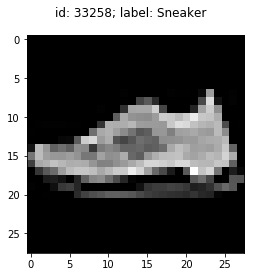

In [11]:
rand_num = random.randint(0,len(train_dataset))
img = train_dataset.data[rand_num].numpy()
label_idx = train_dataset.targets[rand_num]
label = classes[label_idx] 

plt.imshow(img,cmap="gray")
plt.suptitle('id: %d; label: %s'%(rand_num,label))

In [12]:
class SimpleDNN(nn.Module):
    def __init__(self):
        super(SimpleDNN,self).__init__()
        self.dnn = nn.Sequential(
                            nn.Linear(784,256),
                            nn.ReLU(),
                            nn.Linear(256,64),
                            nn.ReLU(),
                            nn.Linear(64,10),
                            nn.Sigmoid()
                        )
    def forward(self, x):
        out = self.dnn(x)
        return out

In [13]:
def train(model, train_loader, valid_loader, criterion, optimizer):
    
    train_loss = 0.0
    train_corrects = 0
    
    model.train()
     
    for batch_num, (inputs, labels) in enumerate(train_loader):
        if DEVICE == "cuda":
            model = model.to(DEVICE)
            inputs = inputs.to(DEVICE)
        
        model.zero_grad()
        
        inputs = inputs.view(-1,784)
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        train_loss += loss
        
        preds = torch.argmax(outputs,axis=1)
        preds_corrects = torch.sum(labels==preds).item()
        train_corrects += preds_corrects
        
        loss.backward()
        optimizer.step()
        
    model.eval()
    with torch.no_grad():
        valid_loss = 0.0
        valid_corrects = 0
        best_loss = np.inf
        for batch_num, (inputs, labels) in enumerate(valid_loader):
            inputs = inputs.view(-1,784)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss
            
            preds = torch.argmax(outputs, axis=1)
            preds_corrects = torch.sum(labels==preds).item()
            valid_corrects += preds_corrects
            
    train_loss = train_loss / len(train_loader)
    valid_loss = valid_loss / len(valid_loader)
    
    train_acc = train_corrects / len(train_loader.dataset)
    valid_acc = valid_corrects / len(valid_loader.dataset)
    
    return train_loss, valid_loss, train_acc, valid_acc
    
def predict(model, test_loader, criterion):
    
    test_loss = 0.0
    test_corrects = 0
    prediction = list()
    
    model.eval()
    with torch.no_grad():
        for batch_num, (inputs, labels) in enumerate(test_loader):
            if DEVICE == "cuda":
                model = model.to(DEVICE)
                inputs = inputs.to(DEVICE)
                
            inputs = inputs.view(-1,784)
            outputs = model(inputs)
            loss = criterion(outputs,labels)
            test_loss += loss
            
            preds = torch.argmax(outputs,axis=1)
            prediction.append(preds.data.numpy())
            preds_corrects = torch.sum(preds == labels).item()
            test_corrects += preds_corrects
            
    test_loss = test_loss / len(test_loader)
    test_acc = test_corrects / len(test_loader.dataset)
    prediction= np.concatenate(np.array(prediction))
    
    return test_loss, test_acc, prediction

In [14]:
model = SimpleDNN()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

In [15]:
model_file = os.path.join(model_path,'FashionDNN.pt')

if not os.path.isdir(model_path):
    os.path.mkdir(model_path)
    
if os.path.isfile(os.path.join(model_path,'FashionDNN.pt')):
    print("Utilizing Previous Model")
    model.load_state_dict(torch.load(model_file))

best_loss = np.inf
for epoch in tqdm_notebook(range(EPOCHS)):
    train_loss, valid_loss, train_acc, valid_acc= train(model, train_loader, valid_loader, criterion, optimizer)
    print("EPOCH: {}/{}; train_loss: {:.4f}; valid_loss: {:.4f}; train_acc: {:.4f}; valid_acc: {:.4f}".format(epoch+1,EPOCHS,train_loss,valid_loss,train_acc,valid_acc))
    if valid_loss < best_loss:
        print("valid_loss broken from {:.4f} to {:.4f}".format(best_loss,valid_loss))
        torch.save(model.state_dict(),model_file)
        best_loss = valid_loss

Utilizing Previous Model


EPOCH: 1/5; train_loss: 1.5881; valid_loss: 1.5848; train_acc: 0.1601; valid_acc: 0.6441
valid_loss broken from inf to 1.5848
EPOCH: 2/5; train_loss: 1.5820; valid_loss: 1.5722; train_acc: 0.1620; valid_acc: 0.6625
valid_loss broken from 1.5848 to 1.5722
EPOCH: 3/5; train_loss: 1.5758; valid_loss: 1.5726; train_acc: 0.1640; valid_acc: 0.6593
EPOCH: 4/5; train_loss: 1.5694; valid_loss: 1.5784; train_acc: 0.1657; valid_acc: 0.6529
EPOCH: 5/5; train_loss: 1.5643; valid_loss: 1.5710; train_acc: 0.1670; valid_acc: 0.6606
valid_loss broken from 1.5722 to 1.5710



In [16]:
test_loss, test_acc, predictions = predict(model, test_loader, criterion)
print("test_loss: {:.4f}; test_acc: {:.4f}".format(test_loss,test_acc))

test_loss: 1.5804; test_acc: 0.8101


## 10.3. [회귀] 캘리포니아 집값 예측

In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [18]:
class HousingDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        super(HousingDataset,self).__init__()
        self.X = X
        self.y = y
        self.transform = transform
        
    def __len__(self):
        return len(self.X)
        
    def __getitem__(self, index):
        X = self.X[index]
        y = self.y[index]
        return torch.tensor(X,dtype=torch.float), torch.tensor(y, dtype=torch.float)

In [19]:
train_dataset = HousingDataset(X_train, y_train)
valid_dataset = HousingDataset(X_valid, y_valid)
test_dataset = HousingDataset(X_test, y_test)

In [20]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

Non-Concatenated Pytorch DNN Model

In [28]:
class CAHousingDNN(nn.Module):
    def __init__(self):
        super(CAHousingDNN,self).__init__()
        self.dnn = nn.Sequential(
                            nn.Linear(8,30),
                            nn.ReLU(),
                            nn.Linear(30,1)
                        )
        
    def forward(self, x):
        return self.dnn(x)

Implementing Pytorch Concatenate DNN Model

In [22]:
model = CAHousingDNN()
criterion = nn.MSELoss()
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

In [23]:
def train(model, train_loader, valid_loader, criterion, optimizer):
    model.train()
    
    train_loss = 0.0
    valid_loss = 0.0
    
    for batch_num, (inputs, labels) in enumerate(train_loader):
        if DEVICE == "cuda":
            model = model.to(DEVICE)
            inputs = inputs.to(DEVICE)
            
        outputs = model(inputs)
        loss = criterion(outputs,labels)
        train_loss += loss
        
        loss.backward()
        optimizer.step()
    
    model.eval()
    with torch.no_grad():
        for inputs,labels in valid_loader:
            if DEVICE == "cuda":
                model = model.to(DEVICE)
                inputs = inputs.to(DEVICE)
                
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss
            
    return train_loss, valid_loss

In [27]:
model_file = os.path.join(model_path,'CAHousingDNN.pt')

if not os.path.isdir(model_path):
    os.path.mkdir(model_path)
    
if os.path.isfile(model_file):
    print("Utilizing Previous Model")
    model.load_state_dict(torch.load(model_file))

best_loss = np.inf
for epoch in tqdm_notebook(range(EPOCHS)):
    train_loss, valid_loss= train(model, train_loader, valid_loader, criterion, optimizer)
    print("EPOCH: {}/{}; train_loss: {:.4f}; valid_loss: {:.4f}".format(epoch+1,EPOCHS,train_loss,valid_loss))
    if valid_loss < best_loss:
        print("valid_loss broken from {:.4f} to {:.4f}".format(best_loss,valid_loss))
        torch.save(model.state_dict(),model_file)
        best_loss = valid_loss

Utilizing Previous Model


C:\Users\kwon2\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:445: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\kwon2\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:445: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\kwon2\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:445: UserWarning: Using a target size (torch.Size([14])) that is different to the input size (torch.Size([14, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_lo

EPOCH: 1/5; train_loss: 6611.2090; valid_loss: 1618.5488
valid_loss broken from inf to 1618.5488
EPOCH: 2/5; train_loss: 3959.7351; valid_loss: 1896.3669
EPOCH: 3/5; train_loss: 8007.6118; valid_loss: 3196.7061
EPOCH: 4/5; train_loss: 8816.6455; valid_loss: 2937.9341
EPOCH: 5/5; train_loss: 7964.2832; valid_loss: 13160.7080

